<a href="https://colab.research.google.com/github/RodrigoCoouto/Template_Trab_BD1_2020/blob/master/Gestor_de_Tarefas_e_Projeto_BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Realizando conexão com banco de dados.

In [ ]:
import psycopg2 as psy
import pandas as panda
import matplotlib.pyplot as plt


#!pip install --user psycopg2-binary
#!pip install --user seaborn
#!pip install --user pandas


connect = psy.connect(host = "kesavan.db.elephantsql.com", database = "xtdieiad", user = "xtdieiad", password = "vzRSCk4oQgw8YoDIO8YOEM5UdCMGI9Wu")

cursor = connect.cursor()

cursor.execute('start transaction')

1 - Consultas com Inserts

In [ ]:
import seaborn as sns
import pandas as pd


insert_tarefa = panda.read_sql_query("SELECT * FROM Tarefa", connect)

insert_projeto = panda.read_sql_query("SELECT * FROM Projeto", connect)

insert_cargo = panda.read_sql_query("SELECT * FROM Cargo", connect)

insert_prioridade = panda.read_sql_query("SELECT * FROM Prioridade", connect)

insert_estado = panda.read_sql_query("SELECT * FROM Estado", connect)

insert_pessoa = panda.read_sql_query("SELECT * FROM Pessoa", connect)



In [ ]:
insert_tarefa

,codigo,nome,data_limite,descricao
0,1299,Operação de soma,2021-12-20,O deve programar a função de soma
1,1548,Definir peças,2022-01-10,"Listar o peão,cavalo,bispo,dama,rei e torre"
2,6266,Definir sentido,2021-12-21,O responsavél deve definir em qual sentido a r...
3,5556,Definir funções,2022-01-02,O responsavél deve definir as funções da maquina
4,5513,Definir velocidade,2022-01-15,O responsável deve definir a velocidade máxima...
5,8548,Definir peso,2022-01-01,Calcular o peso do galo
6,4863,Definir tamanho,2021-12-27,Propor o tamanho da chaminé
7,4153,Definir estrutura,2022-01-12,O responsável deve definir como será a estrutu...
8,9562,Definir movimentos,2021-01-31,Escolher movimentos para jogo
9,9699,Definir volume,2022-01-19,Calcular o decibéis do som


In [ ]:
insert_projeto

,codigo,nome,data_entrega
0,17,Calculadora,2022-03-15
1,56,Xadrez,2022-07-18
2,25,Roleta,2022-03-21
3,13,Máquina,2022-08-15
4,96,Carro,2022-05-30
5,24,Galo,2022-05-26
6,28,Chaminé,2022-08-26
7,12,Moto,2023-01-20
8,2,Jogo,2022-12-14
9,3,Som,2021-12-31


In [ ]:
insert_cargo

,codigo_projeto,adm,cargo1,cargo2,cargo3,cargo4
0,56,54321,64321,54312,55555,65432
1,25,66222,54444,54322,54211,54213
2,17,64321,54322,54211,54213,65432
3,96,54312,54444,64321,54321,65432
4,13,55555,65432,64321,54211,54444
5,12,65432,54321,66222,54312,55555
6,24,54444,54321,55555,64312,54321
7,2,54211,55555,65432,54213,54322
8,28,54213,54321,64321,55555,54312
9,3,54322,54211,54444,54213,54321


In [ ]:
insert_prioridade


,codigo_tarefa,nivel1,nivel2,nivel3
0,1299,True,False,False
1,1548,False,False,True
2,6266,False,True,False
3,5513,True,False,False
4,8548,False,True,False
5,4863,False,False,True
6,4153,False,True,False
7,9562,True,False,False
8,9699,False,True,False


In [ ]:
insert_estado

,codigo_projeto,codigo_tarefa,todo,doing,done
0,17,1299,False,True,False
1,56,1548,False,False,True
2,25,6266,False,True,False
3,13,5556,True,False,False
4,96,5513,False,False,True
5,24,8548,True,False,False
6,28,4863,True,False,False
7,12,4153,False,True,False
8,2,9562,False,False,True
9,3,9699,False,False,True


In [ ]:
insert_pessoa

,id,nome,data_nascimento,email,senha
0,54321,Paulo,1998-01-11,paulo24@gmail.com,1198
1,54312,Rodrigo,1997-02-22,rodrigoocg@hotmail.com,2297
2,54213,Joao,1990-03-25,joao675@gmail.com,2590
3,54211,Ricardo,2000-07-28,ricardo09yude@hotmail.com,2800
4,54322,Pedro,1999-12-31,pedraogg@gmail.com,3199
5,54444,Eduardo,1987-06-25,dudu789@gmail.com,2587
6,64321,Maria,2001-01-21,mariamaria@hotmail.com,2101
7,55555,Joaquina,1993-06-29,joaquinaaa@gmail.com,2993
8,65432,José,1998-04-27,jose_egit@gmail.com,2798
9,66222,Henrique,2001-01-01,costa_henrique@gmail.com,1011


2 - Consultas Com Filtro Where

In [ ]:
import seaborn as sns
import pandas as pd
import psycopg2 as psy

where_nome_email = pd.read_sql_query("""SELECT nome , email from pessoa
WHERE nome = 'Paulo'""",connect)

where_nome_data_entrega = pd.read_sql_query("""SELECT nome, data_entrega from projeto WHERE nome = 'Calculadora'""",connect)

where_tarefa = pd.read_sql_query("""SELECT nome , descricao from tarefa
WHERE codigo = '1299'""",connect)


where_nome_data_nascimento = pd.read_sql_query("""SELECT nome , data_nascimento from pessoa
WHERE data_nascimento > '1999-01-01'""",connect)



In [ ]:

where_nome_email


,nome,email
0,Paulo,paulo24@gmail.com


In [ ]:
where_nome_data_entrega

,nome,data_entrega
0,Calculadora,2022-03-15


In [ ]:
where_tarefa

,nome,descricao
0,Operação de soma,O deve programar a função de soma


In [ ]:
where_nome_data_nascimento

,nome,data_nascimento
0,Ricardo,2000-07-28
1,Pedro,1999-12-31
2,Maria,2001-01-21
3,Henrique,2001-01-01


3 - Consultas que usam operadores lógicos, aritméticos e tabelas ou campos renomeado.


In [ ]:
logico_done = panda.read_sql_query("SELECT * FROM estado WHERE done is not False", connect)

logico_pessoa = panda.read_sql_query("SELECT * FROM pessoa WHERE nome='Paulo' or nome='Joao'", connect)

projeto_codigo = panda.read_sql_query("SELECT * FROM projeto WHERE codigo > 10 AND codigo < 15", connect)

logico_cargo = panda.read_sql_query("SELECT * FROM Cargo WHERE cargo4 is not NULL", connect)

projeto_adm = panda.read_sql_query("SELECT * FROM cargo WHERE adm = 54444 or cargo1 = 54444", connect)


tarefa_data = panda.read_sql_query("""SELECT nome , data_limite from tarefa
WHERE data_limite > '2022-01-01'""",connect)

prioridade_nivel = panda.read_sql_query("SELECT * FROM prioridade WHERE nivel1 = True or nivel2 = True", connect)
pessoa_id = panda.read_sql_query("SELECT * FROM pessoa WHERE id != 54444 and id != 55555", connect)


rename_nome_pessoa = panda.read_sql_query("""SELECT nome AS "nome_pessoa" FROM Pessoa""", connect)

rename_nome_projeto = panda.read_sql_query("""SELECT nome AS "nome_projeto" FROM Projeto""", connect)

rename_nome_tarefa = panda.read_sql_query("""SELECT nome AS "nome_tarefa" FROM Tarefa""", connect)


In [ ]:
pessoa_id

,id,nome,data_nascimento,email,senha
0,54321,Paulo,1998-01-11,paulo24@gmail.com,1198
1,54312,Rodrigo,1997-02-22,rodrigoocg@hotmail.com,2297
2,54213,Joao,1990-03-25,joao675@gmail.com,2590
3,54211,Ricardo,2000-07-28,ricardo09yude@hotmail.com,2800
4,54322,Pedro,1999-12-31,pedraogg@gmail.com,3199
5,64321,Maria,2001-01-21,mariamaria@hotmail.com,2101
6,65432,José,1998-04-27,jose_egit@gmail.com,2798
7,66222,Henrique,2001-01-01,costa_henrique@gmail.com,1011


4 - Consultas que usam operadores like e datas

In [ ]:
likepessoa_nome_r = pd.read_sql_query("""SELECT * FROM Pessoa WHERE nome LIKE 'R%'""",connect)

likepessoa_email_a = pd.read_sql_query("""SELECT Email FROM Pessoa WHERE Email ILIKE 'a%'""",connect)

liketarefa_descricao_o = pd.read_sql_query("""SELECT * FROM Tarefa WHERE descricao ILIKE 'o%'""",connect)

likepessoa_nome_a = pd.read_sql_query("""SELECT * FROM pessoa WHERE nome LIKE '%a'""",connect)

liketarefa_nome_da = pd.read_sql_query("""SELECT * FROM tarefa WHERE nome ILIKE '%da%'""",connect)

liketarefa_descricao_ae = pd.read_sql_query("""SELECT * FROM tarefa WHERE descricao ILIKE '%a%e%'""",connect)

likepessoa_email_aulo = pd.read_sql_query("""SELECT * FROM pessoa WHERE email ILIKE '_aulo%'""",connect)

likeprojeto_nome_c = pd.read_sql_query("""SELECT * FROM projeto WHERE nome ILIKE 'c%'""",connect)

liketarefa_nome_s = pd.read_sql_query("""SELECT * FROM tarefa WHERE nome ILIKE '%s'""",connect)



likedata_data_nascimento = pd.read_sql_query("""SELECT data_nascimento as "Data Atual", Data_Nascimento, nome FROM Pessoa""",connect)

likedata_data_entrega = pd.read_sql_query("""SELECT data_entrega as Data_entrega, nome FROM Projeto""",connect)

likedata_data_limite = pd.read_sql_query("""SELECT data_limite as  "Data_Final", nome,descricao FROM Tarefa""",connect)

In [ ]:
liketarefa_nome_s

,codigo,nome,data_limite,descricao
0,1548,Definir peças,2022-01-10,"Listar o peão,cavalo,bispo,dama,rei e torre"
1,5556,Definir funções,2022-01-02,O responsavél deve definir as funções da maquina
2,9562,Definir movimentos,2021-01-31,Escolher movimentos para jogo



5-Instruções aplicando atualização e exclusão de dados

In [ ]:

import seaborn as sns
import pandas as pd
import psycopg2


#update_novo_nome = pd.read_sql_query("UPDATE pessoa SET nome = 'Paulo Ricardo' WHERE id = 54321",connect)

#update_nome_2 = pd.read_sql_query("""UPDATE tarefa SET nome = 'Operação de Somadora' WHERE  = 'Operação de Soma’""",connect)

#update_email = pd.read_sql_query("""UPDATE pessoa SET email = 'ricardo01349yuide@hotmail.com' WHERE email = 'ricardo09yude@hotmail.com’""",connect)

#delete_tarefa = pd.read_sql_query("""DELETE FROM Tarefa WHERE codigo = 1299""",connect)

#delete_nome = pd.read_sql_query("""DELETE FROM Pessoa WHERE Nome = 'Paulo' """,connect)

#delete_projeto = pd.read_sql_query("""DELETE FROM Projeto WHERE data_entrega = '2022/05/26' """,connect)




6 - Consultas com inner join e order by

In [ ]:
inner_tarefa_prioridade =   pd.read_sql_query("""SELECT C.codigo tarefa,C.nome as Nome, F.nivel1 as normal, F.nivel2 as urgente, F.nivel3 as imediato
from tarefa as c
inner join prioridade as f on c.codigo = f.codigo_tarefa 
order by nome""",connect)

inner_tarefa_estado = pd.read_sql_query("""SELECT c.codigo tarefa,C.nome as Nome, F.todo as fazer, F.doing as Fazendo, F.done as Realizada
from tarefa as c
inner join estado as f on c.codigo = f.codigo_tarefa 
order by nome""",connect)

inner_projeto_cargo = pd.read_sql_query("""SELECT c.codigo Projeto,C.nome as Nome, F.adm as Criador
from Projeto as c
inner join Cargo as f on c.codigo = f.codigo_projeto
order by nome""",connect)

inner_projeto_estado = pd.read_sql_query("""SELECT c.codigo projeto,C.nome as Nome,F.codigo_tarefa as tarefa, F.todo as fazer, F.doing as Fazendo, F.done as Realizada
from tarefa as c
inner join estado as f on c.codigo = f.codigo_tarefa 
order by nome""",connect)

inner_estado_prioridade = pd.read_sql_query("SELECT c.codigo_tarefa Tarefa,c.todo as fazer, c.doing as Fazendo, c.done as Realizada,F.nivel1 as normal, F.nivel2 as urgente, F.nivel3 as imediato from Estado as c inner join prioridade as f on c.codigo_tarefa=f.codigo_tarefa",connect)

inner_pessoa_cargo = pd.read_sql_query("""SELECT c.id ID,C.nome as Nome, F.codigo_projeto as Projeto_criado
from Pessoa as c
inner join Cargo as f on c.id = f.adm
order by nome""",connect)

In [ ]:
inner_pessoa_cargo

,id,nome,projeto_criado
0,54444,Eduardo,24
1,66222,Henrique,25
2,54213,Joao,28
3,55555,Joaquina,13
4,65432,José,12
5,64321,Maria,17
6,54321,Paulo,56
7,54322,Pedro,3
8,54211,Ricardo,2
9,54312,Rodrigo,96



7- Consultas com group by e funções de agrupamento

In [ ]:
group_nome = pd.read_sql_query("""SELECT id, nome FROM pessoa GROUP BY id""",connect)

group_codigo_nome = pd.read_sql_query("""SELECT codigo, nome FROM projeto GROUP BY codigo""",connect)

group_email_id = pd.read_sql_query("""SELECT email, id FROM pessoa GROUP BY id""",connect)

group_codigo_descricao = pd.read_sql_query("""SELECT codigo, descricao FROM tarefa GROUP BY codigo""",connect)

group_tarefa_estado = pd.read_sql_query("""SELECT t.codigo, e.codigo_tarefa FROM tarefa AS t
INNER JOIN estado AS e ON (e.codigo_tarefa = t.codigo ) 
GROUP BY t.codigo,e.codigo_tarefa""",connect)

group_projeto_cargo = pd.read_sql_query("""SELECT p.codigo, c.codigo_projeto FROM projeto AS p
INNER JOIN cargo AS c ON (c.codigo_projeto = p.codigo) 
GROUP BY p.codigo,c.codigo_projeto""",connect)

In [ ]:
group_projeto_cargo

,codigo,codigo_projeto
0,25,25
1,56,56
2,3,3
3,2,2
4,12,12
5,28,28
6,17,17
7,13,13
8,24,24
9,96,96



8- Consultas com left,right e full join



In [ ]:
left_pessoa_cargo = pd.read_sql_query("""Select P.nome AS "Nome da Pessoa",
P.email AS "Email da Pessoa",
C.adm AS "Administrador"
FROM Pessoa AS P LEFT JOIN 
Cargo AS C ON (P.id = C.adm)""",connect)

right_tarefa_projeto = pd.read_sql_query("""SELECT tarefa.nome AS "Nome da Tarefa", 

tarefa.data_limite AS "Data Limite da Tarefa"
FROM projeto RIGHT JOIN tarefa ON (tarefa.codigo = projeto.codigo)
""",connect)

fulljoin_projeto_estado = pd.read_sql_query("""SELECT e.codigo_tarefa,p.nome AS "Nome do Projeto", 
p.data_entrega AS "Data de Entrega"
FROM projeto AS p FULL JOIN estado AS e ON (p.codigo = e.codigo_projeto)
""",connect)

fulljoin_tarefa_prioridade = pd.read_sql_query("""SELECT p.codigo_tarefa,t.nome AS "Nome da Tarefa", t.descricao AS "Descrição Tarefa" FROM tarefa AS t FULL JOIN prioridade as p ON(t.codigo = p.codigo_tarefa)""",connect)

In [ ]:
fulljoin_tarefa_prioridade

,codigo_tarefa,Nome da Tarefa,Descrição Tarefa
0,1299.0,Operação de soma,O deve programar a função de soma
1,1548.0,Definir peças,"Listar o peão,cavalo,bispo,dama,rei e torre"
2,6266.0,Definir sentido,O responsavél deve definir em qual sentido a r...
3,5513.0,Definir velocidade,O responsável deve definir a velocidade máxima...
4,8548.0,Definir peso,Calcular o peso do galo
5,4863.0,Definir tamanho,Propor o tamanho da chaminé
6,4153.0,Definir estrutura,O responsável deve definir como será a estrutu...
7,9562.0,Definir movimentos,Escolher movimentos para jogo
8,9699.0,Definir volume,Calcular o decibéis do som
9,NaN,Definir funções,O responsavél deve definir as funções da maquina


9- Consultas com self join e view

In [ ]:

#CREATE VIEW idnome AS
#(SELECT nome, id FROM pessoa)
#CREATE VIEW codtanometa AS 
#SELECT codigo, nome FROM tarefa
#CREATE VIEW codpronomepro AS 
#SELECT codigo, nome FROM projeto
#CREATE VIEW  codtadatali AS 
#SELECT codigo, data_limite FROM tarefa
#CREATE VIEW codprodatali AS 
#SELECT codigo, data_entrega FROM projeto

view_selfjoin = pd.read_sql_query("""select * from projeto j1, projeto j2 where j1.codigo = j2.codigo order by j1.codigo""",connect)

view_idnome = pd.read_sql_query("""SELECT * FROM idnome""",connect)

view_codtanometa = pd.read_sql_query("""SELECT * FROM codtanometa""",connect)

view_codpronomepro = pd.read_sql_query("""SELECT * FROM codpronomepro""",connect)

view_codtadatali = pd.read_sql_query("""SELECT * FROM codtadatali""",connect)

view_codprodatali = pd.read_sql_query("""SELECT * FROM codprodatali""",connect)




In [ ]:
view_selfjoin

,codigo,nome,data_entrega,codigo,nome,data_entrega
0,2,Jogo,2022-12-14,2,Jogo,2022-12-14
1,3,Som,2021-12-31,3,Som,2021-12-31
2,12,Moto,2023-01-20,12,Moto,2023-01-20
3,13,Máquina,2022-08-15,13,Máquina,2022-08-15
4,17,Calculadora,2022-03-15,17,Calculadora,2022-03-15
5,24,Galo,2022-05-26,24,Galo,2022-05-26
6,25,Roleta,2022-03-21,25,Roleta,2022-03-21
7,28,Chaminé,2022-08-26,28,Chaminé,2022-08-26
8,56,Xadrez,2022-07-18,56,Xadrez,2022-07-18
9,96,Carro,2022-05-30,96,Carro,2022-05-30


10 - Subconsultas

In [ ]:
sub_cargo = pd.read_sql_query("""SELECT p.nome AS "Nome" FROM pessoa AS p
WHERE p.id = (SELECT adm FROM cargo WHERE adm = 54321)GROUP BY p.nome""",connect)

sub_estado = pd.read_sql_query("""SELECT p.nome AS "Nome" FROM projeto AS p
WHERE p.codigo = (SELECT codigo_projeto FROM estado WHERE codigo_projeto = 24)GROUP BY p.nome""",connect)


sub_prioridade = pd.read_sql_query("""SELECT t.nome AS "Nome da Tarefa" FROM tarefa AS t
WHERE t.codigo = (SELECT codigo_tarefa FROM prioridade WHERE codigo_tarefa = 1299)GROUP BY t.nome""",connect)

sub_cargo2 = pd.read_sql_query("""SELECT p.nome AS "ID da Pessoa" FROM pessoa AS p
WHERE p.id = (SELECT adm FROM cargo WHERE codigo_projeto = 28)GROUP BY p.nome""",connect)




In [ ]:
sub_cargo2

,ID da Pessoa
0,Joao


TESTE VIEW CURSOR

In [ ]:
import psycopg2 as psy
import pandas as pd

cursor_tabela = connect.cursor()


cursor_tabela.execute(""" CREATE VIEW vw_tarefa AS SELECT codigo,nome,data_limite,descricao from tarefa""");
cursor_tabela.execute("""CREATE VIEW vw_projeto AS SELECT codigo,nome,data_entrega from projeto""");
cursor_tabela.execute("""CREATE VIEW vw_cargo AS SELECT codigo_projeto,adm,cargo1,cargo2,cargo3,cargo4 from cargo""");
cursor_tabela.execute("""CREATE VIEW vw_estado AS SELECT  codigo_projeto,codigo_tarefa,todo,doing,done from estado""");
cursor_tabela.execute("""CREATE VIEW vw_pessoa AS SELECT  id,nome,data_nascimento,email,senha from pessoa""");
cursor_tabela.execute("""CREATE VIEW vw_prioridade AS SELECT  codigo_tarefa,nivel1,nivel2,nivel3 from prioridade""");



In [ ]:
vw_tarefa_view

In [ ]:
connect.commit()

In [ ]:
cursor.close()


1 - Relatorio que mostra o nome de cada pessoa e a quantidade de projetos que ela gerencia 


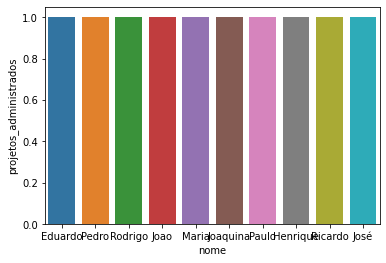

In [ ]:
res_nomeQtd = pd.read_sql_query("""
                           select ep.nome, count(adm) as projetos_administrados
                            from Cargo as e 
                            inner join Pessoa ep 
                            on e.adm = ep.id 
                            group by nome
                            """,connect)
res_nomeQtd
sns.barplot(x='nome',y='projetos_administrados',data=res_nomeQtd)

2 - Relatorio que mostra a quantidade de tarefas com prazo de entrega,em cada ano.

In [ ]:
re_entregas = pd.read_sql_query("""SELECT EXTRACT(year FROM data_entrega) as "Ano", 
     COUNT(EXTRACT(year FROM data_entrega)) as "Projetos" FROM Projeto AS a 
    GROUP BY EXTRACT(year FROM a.data_entrega) ORDER BY EXTRACT(year FROM a.data_entrega)""", connect)


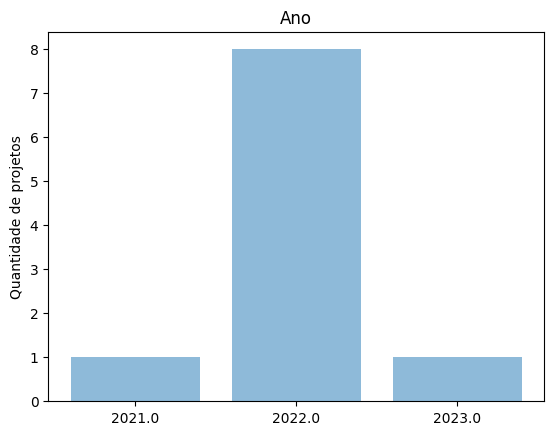

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(re_entregas)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)
 
objects = tuple(df.Ano)
y_pos = np.arange(len(objects))
performance = list(df.Projetos)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Quantidade de projetos')
plt.title('Ano')
 
plt.show()

3 - Relatorio que mostra a quantidade de tarefas em cada tipo de estado.




In [ ]:
res_estado = pd.read_sql_query("""
                           select count(case when todo then 1 end) as fazer,count(case when doing then 1 end) as fazendo,count(case when done then 1 end) as feita
                            from Estado 
                            """,connect)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]


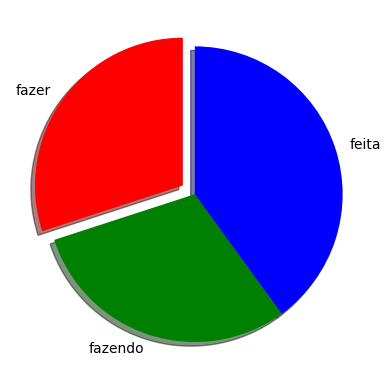

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


df = pd.DataFrame(res_estado)
fatias = [df.fazer, df.fazendo, df.feita]
atividades = ['fazer', 'fazendo', 'feita']
colunas = ['r', 'g', 'b']
 

plt.pie(fatias, labels = atividades, colors = colunas, startangle = 90, shadow = True, explode = (0.1, 0, 0))
 
plt.show()

4 - Relatorio que mostra a quantidade de tarefas a ser realizada em cada mês.


In [ ]:
re_entregas_tarefa = pd.read_sql_query("""SELECT EXTRACT(month FROM data_limite) as "Mes", 
     COUNT(EXTRACT(month FROM data_limite)) as "Tarefas" FROM Tarefa AS a 
    GROUP BY EXTRACT(month FROM a.data_limite) ORDER BY EXTRACT(month FROM a.data_limite)""", connect)
re_entregas_tarefa

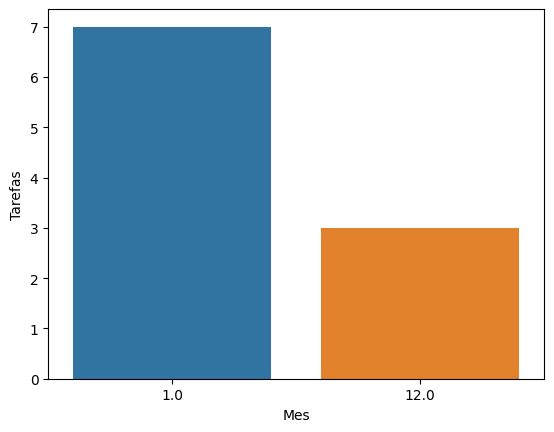

In [ ]:
sns.barplot(x='Mes',y='Tarefas',data=re_entregas_tarefa)

In [ ]:
re_entregas_projeto = pd.read_sql_query("""SELECT EXTRACT(month FROM data_entrega) as "Mes", 
     COUNT(EXTRACT(month FROM data_entrega)) as "Projetos" FROM Projeto AS a 
    GROUP BY EXTRACT(month FROM a.data_entrega) ORDER BY EXTRACT(month FROM a.data_entrega)""", connect)
re_entregas_projeto

,Mes,Projetos
0,1.0,1
1,3.0,2
2,5.0,2
3,7.0,1
4,8.0,2
5,12.0,2


5 - Relatorio que mostra a quantidade de projetos em cada mês.

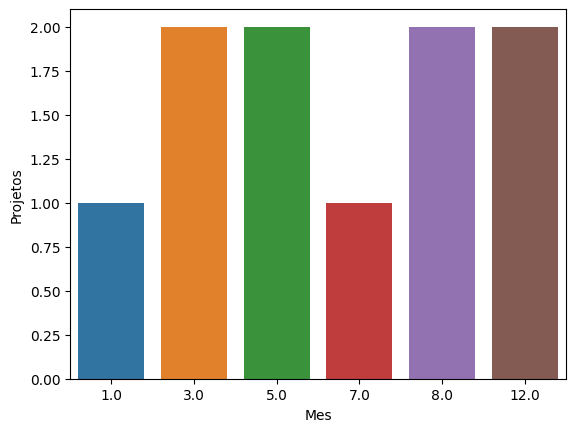

In [ ]:
sns.barplot(x='Mes',y='Projetos',data=re_entregas_projeto)